In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#**PREPROCESSING & ANALYZING**

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Project/Customer churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def unique_value(x):
  for i in x.columns:
    print({f'Columns {i} contains values: {x[i].unique()}'})

unique_value(data)

{"Columns customerID contains values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'\n '3186-AJIEK']"}
{"Columns gender contains values: ['Female' 'Male']"}
{'Columns SeniorCitizen contains values: [0 1]'}
{"Columns Partner contains values: ['Yes' 'No']"}
{"Columns Dependents contains values: ['No' 'Yes']"}
{'Columns tenure contains values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27\n  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68\n 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0\n 39]'}
{"Columns PhoneService contains values: ['No' 'Yes']"}
{"Columns MultipleLines contains values: ['No phone service' 'No' 'Yes']"}
{"Columns InternetService contains values: ['DSL' 'Fiber optic' 'No']"}
{"Columns OnlineSecurity contains values: ['No' 'Yes' 'No internet service']"}
{"Columns OnlineBackup contains values: ['Yes' 'No' 'No internet service']"}
{"Columns DeviceProtection contains values: ['N

In [ ]:
'''
Chi tiết về data:

customerID: id khách hàng.
gender: nam hoặc nữ.
SeniorCitizen: 1: seniorcitizen, 0: không phải seniorcitizen.
Partner: Khách hàng có bạn đời hay không (Yes, No).
Dependents: Khách hàng có người phụ thuộc hay không (Yes, No).
tenure: Số tháng khách hàng đã ở với công ty.
PhoneService: Có dịch vụ điện thoại hay không (Yes, No).
MultipleLines: Khách hàng có sử dụng điện thoại hay không (Yes, No, No phone service).
InternetService: Nhà cung cấp dịch vụ internet của khách hàng (DSL, Fiber optic, No).
OnlineSecurity: Khách hàng có sử dụng bảo mật trực tuyến hay không (Yes, No, No internet service).
OnlineBackup: Khách hàng có sử dụng sao lưu trực tuyến hay không (Yes, No, No internet service).
DeviceProtection: Khách hàng có sử dụng bảo vệ thiết bị hay không (Yes, No, No internet service).
TechSupport: Khách hàng có hỗ trợ kỹ thuật hay không (Yes, No, No internet service).
StreamingTV: Khách hàng có sử dụng dịch vụ xem TV trực tuyến hay không (Yes, No, No internet service).
StreamingMovies: Khách hàng có sử dụng dịch vụ xem phim trực tuyến hay không (Yes, No, No internet service).
Contract: Thời hạn hợp đồng của khách hàng (Month-to-month, One year, Two year).
PaperlessBilling: Khách hàng có hóa đơn điện tử hay không (Yes, No).
PaymentMethod: Phương thức thanh toán của khách hàng (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
MonthlyCharges: Số tiền tính cho khách hàng hàng tháng.
TotalCharges: Tổng số tiền tính cho khách hàng.
churn: Khách hàng có bỏ đi hay không (Yes, No).



CỘT TOTALCHARGES ĐANG BỊ SAI KIỂU DỮ LIỆU.
'''

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [8]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data.dropna(axis = 0, inplace = True)
data.drop(columns = 'customerID', inplace = True)
data = data.reset_index()
#missing value chiếm tỷ lệ khá nhỏ nên ta bỏ nó đi được.

<ipython-input-10-8dd4e790fa34>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


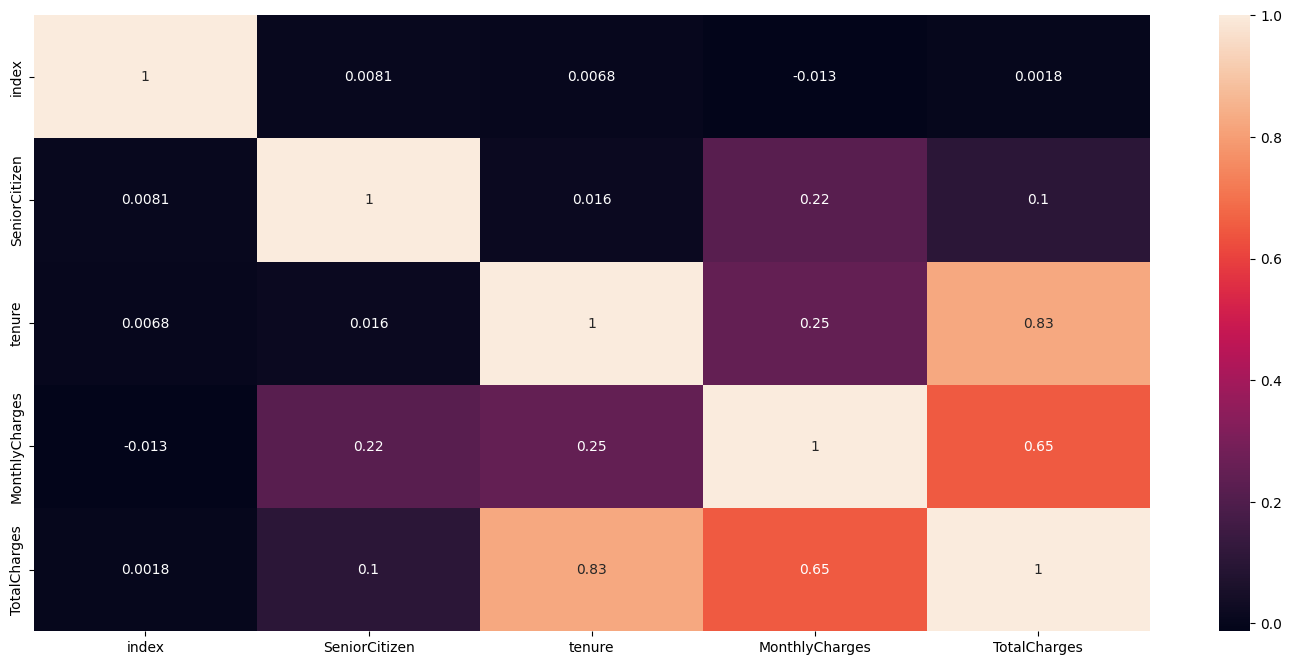

In [10]:
plt.figure(figsize = (18, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()
#các cột không thuộc Object đều có tương quan với nhau

In [11]:
data.describe()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3521.562144,0.162400,32.421786,64.798208,2283.300441
std,2032.832448,0.368844,24.545260,30.085974,2266.771362
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,1762.750000,0.000000,9.000000,35.587500,401.450000
50%,3521.500000,0.000000,29.000000,70.350000,1397.475000
75%,5282.250000,0.000000,55.000000,89.862500,3794.737500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [12]:
col_cate = data.select_dtypes(include = 'object')
print(col_cate)

      gender Partner Dependents PhoneService     MultipleLines  \
0     Female     Yes         No           No  No phone service   
1       Male      No         No          Yes                No   
2       Male      No         No          Yes                No   
3       Male      No         No           No  No phone service   
4     Female      No         No          Yes                No   
...      ...     ...        ...          ...               ...   
7027    Male     Yes        Yes          Yes               Yes   
7028  Female     Yes        Yes          Yes               Yes   
7029  Female     Yes        Yes           No  No phone service   
7030    Male     Yes         No          Yes               Yes   
7031    Male      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes          

In [13]:
cate_cols = [col for col in data if data[col].dtype in ['object']]
print(cate_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [14]:
df_gender = data.groupby('gender')
c_gender = df_gender.size().reset_index(name = 'count')
print(c_gender)

   gender  count
0  Female   3483
1    Male   3549


In [15]:
c = c_gender.set_index(c_gender.columns[0]).transpose()

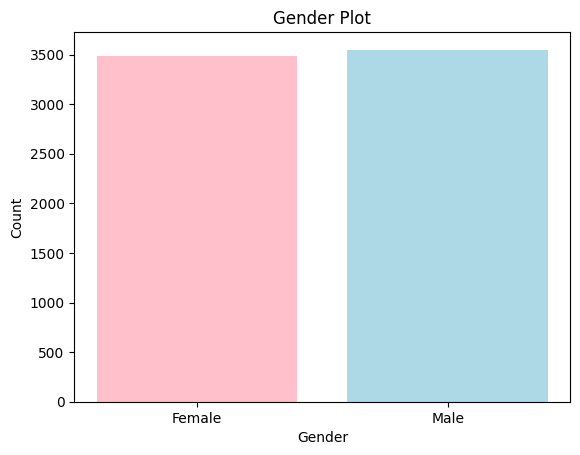

In [16]:
plt.bar(x = 'gender', height = 'count', data = c_gender, color = {'pink', 'lightblue'})
plt.title('Gender Plot', fontsize = 12)
plt.xlabel('Gender', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

<h> Không có sự chênh lệch về giới tính <h>

In [17]:
import plotly.express as px
data_exp = data.copy()
color_map = {'Yes': 'red', 'No': 'blue'}
data_exp['color'] = data_exp['Churn'].map(color_map)
fig = px.parallel_categories(data_exp[['gender', 'Contract', 'Churn', 'color']], color='color', color_continuous_scale='blues')
fig.show()

<h>Đa số các khách hàng đều tiếp tục sử dụng dịch vụ. Số lượng các khách hàng nam rời bỏ không chênh lệch quá lớn so với các khách hàng nữ (ít hơn 9 người).
Các khách hàng sử dụng hợp đồng theo tháng sẽ có tỷ lệ rời bỏ cao hơn 1 năm và 2 năm, các khách hàng sử dụng hợp đồng 2 năm có tỷ lệ rời bỏ cực kỳ nhỏ.
<h>

<ipython-input-18-0e4061e5c280>:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



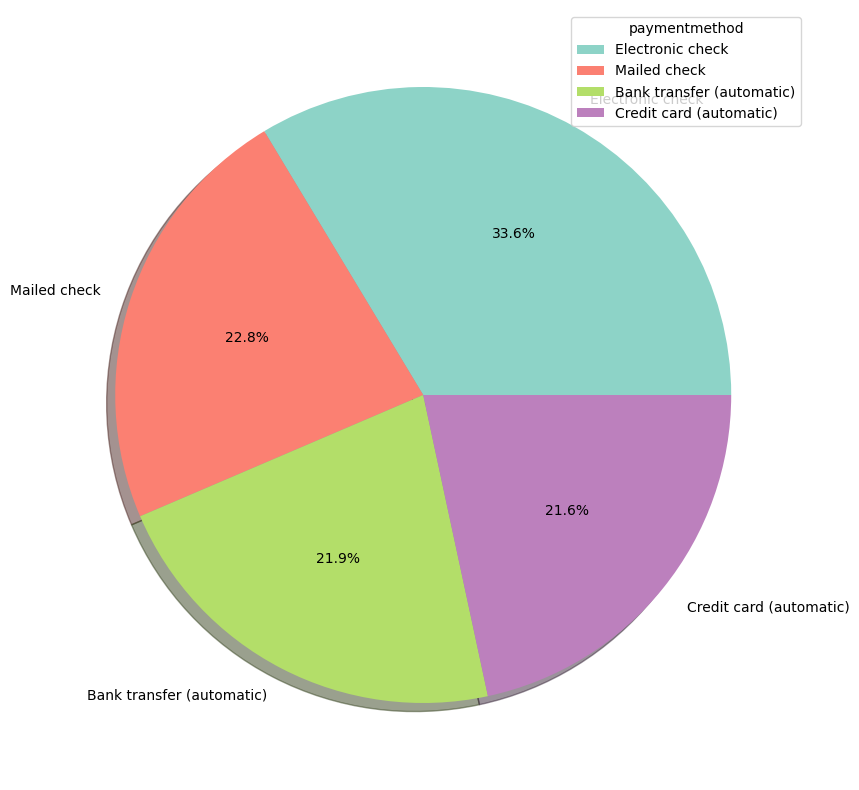

In [18]:
import matplotlib.cm as cm

cmap = cm.get_cmap('Set3')
num_colors = len(data['PaymentMethod'].unique())
colors = [cmap(i / num_colors) for i in range(num_colors)]

plt.figure(figsize = (18, 10))
data['PaymentMethod'].value_counts().plot(kind='pie', colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc = 'best', title = 'paymentmethod')
plt.ylabel('')
plt.show()

<h>
Đa số khách hàng chọn Electronic check, các phương thức thanh toán còn lại không có sự chênh lệch đáng kể.
<h>

<ipython-input-19-79efbd183846>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



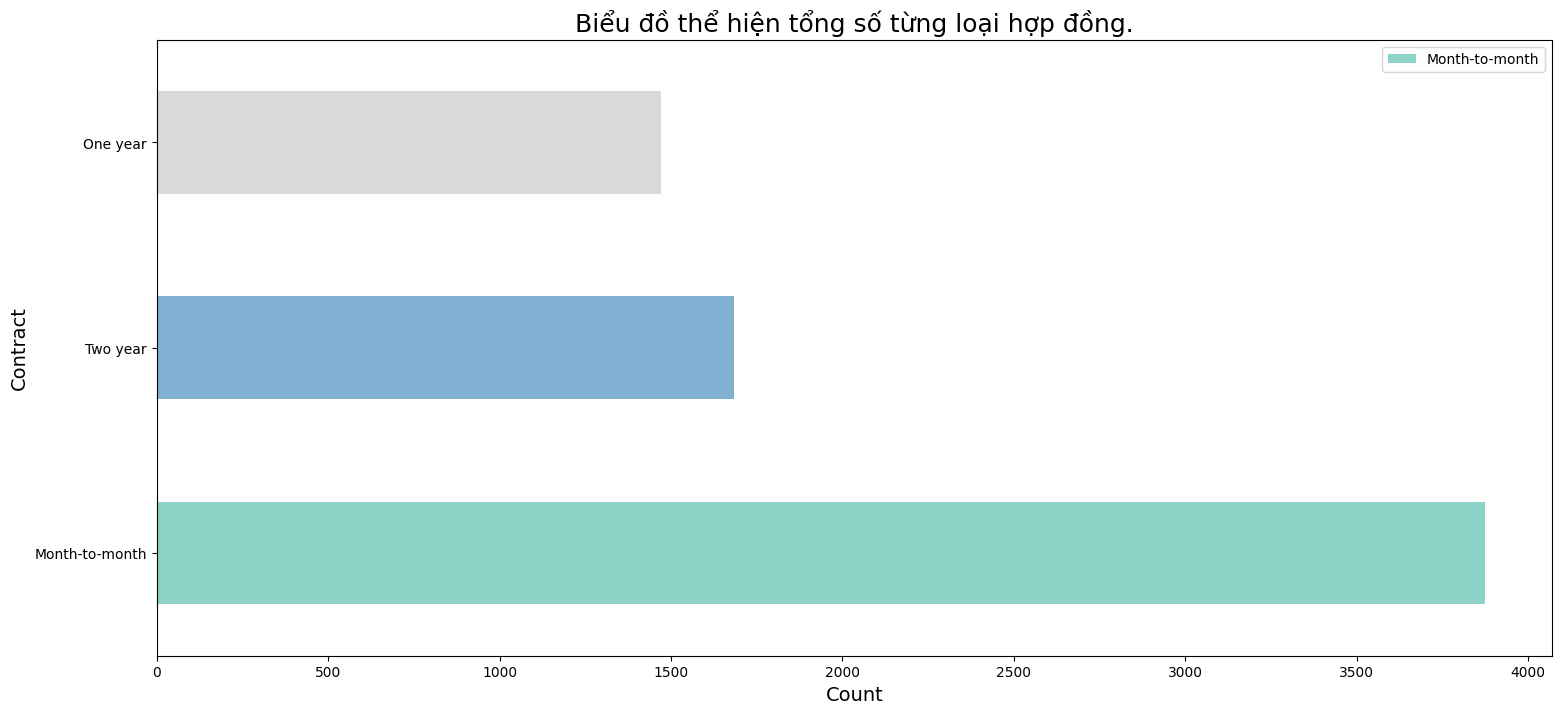

In [19]:
plt.figure(figsize = (18,8))
cmap = cm.get_cmap('Set3')
num_colors = len(data['Contract'].unique())
colors = [cmap(i/num_colors) for i in range(num_colors)]
data['Contract'].value_counts().plot(kind = 'barh', color = colors)
plt.title('Biểu đồ thể hiện tổng số từng loại hợp đồng.', fontsize = 18)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Contract', fontsize = 14)
plt.legend(data_exp['Contract'])
plt.show()
#### => Các khách hàng thường lựa chọn việc hợp đồng theo tháng là chủ yếu.

In [20]:
df1 = data.groupby(by=['gender','Partner', 'Dependents'])['tenure'].mean()
print(df1)

gender  Partner  Dependents
Female  No       No            23.332326
                 Yes           22.027586
        Yes      No            43.060870
                 Yes           40.997722
Male    No       No            23.273846
                 Yes           25.313084
        Yes      No            42.375000
                 Yes           42.169374
Name: tenure, dtype: float64


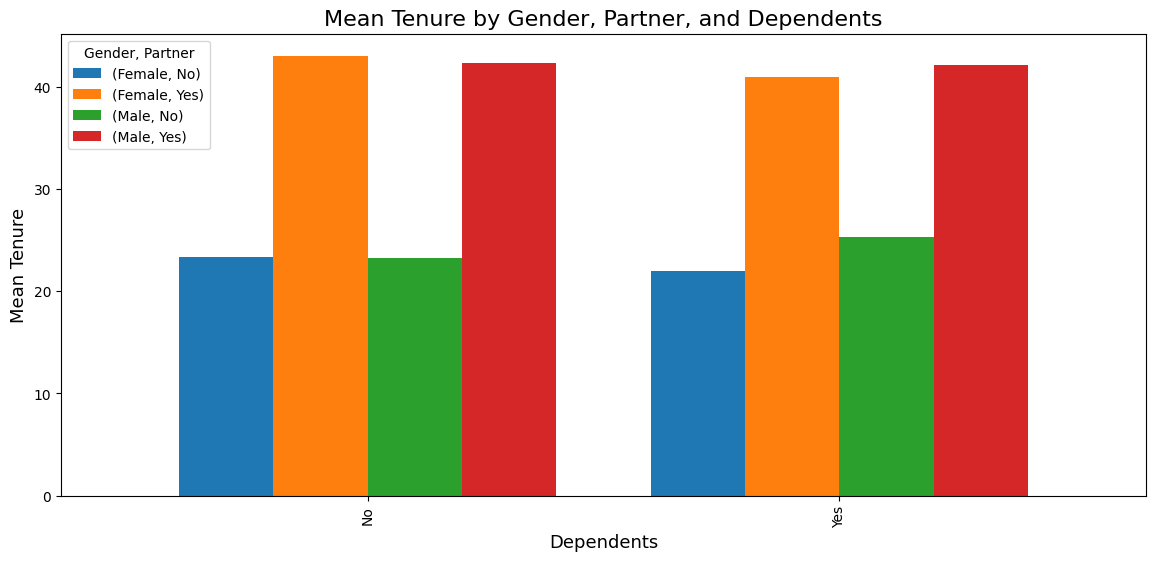

In [21]:
df1_unstacked = df1.unstack(level=[0,1])
fig, ax = plt.subplots(figsize=(14, 6))
df1_unstacked.plot(kind='bar', width=0.8, ax=ax)

ax.set_xlabel('Dependents', fontsize = 13)
ax.set_ylabel('Mean Tenure',fontsize = 13)
ax.set_title('Mean Tenure by Gender, Partner, and Dependents',fontsize = 16)
ax.legend(title='Gender, Partner', loc='upper left')

plt.show()

In [22]:
data_exp.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,color
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,blue
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,blue
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,red
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,blue
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,red


In [27]:
g_charge = data.groupby('gender')['TotalCharges'].sum()
print(g_charge)

gender
Female    7952354.2
Male      8103814.5
Name: TotalCharges, dtype: float64


In [52]:
df = g_charge.reset_index()
df.columns = ['gender', 'TotalCharges']
df.head()

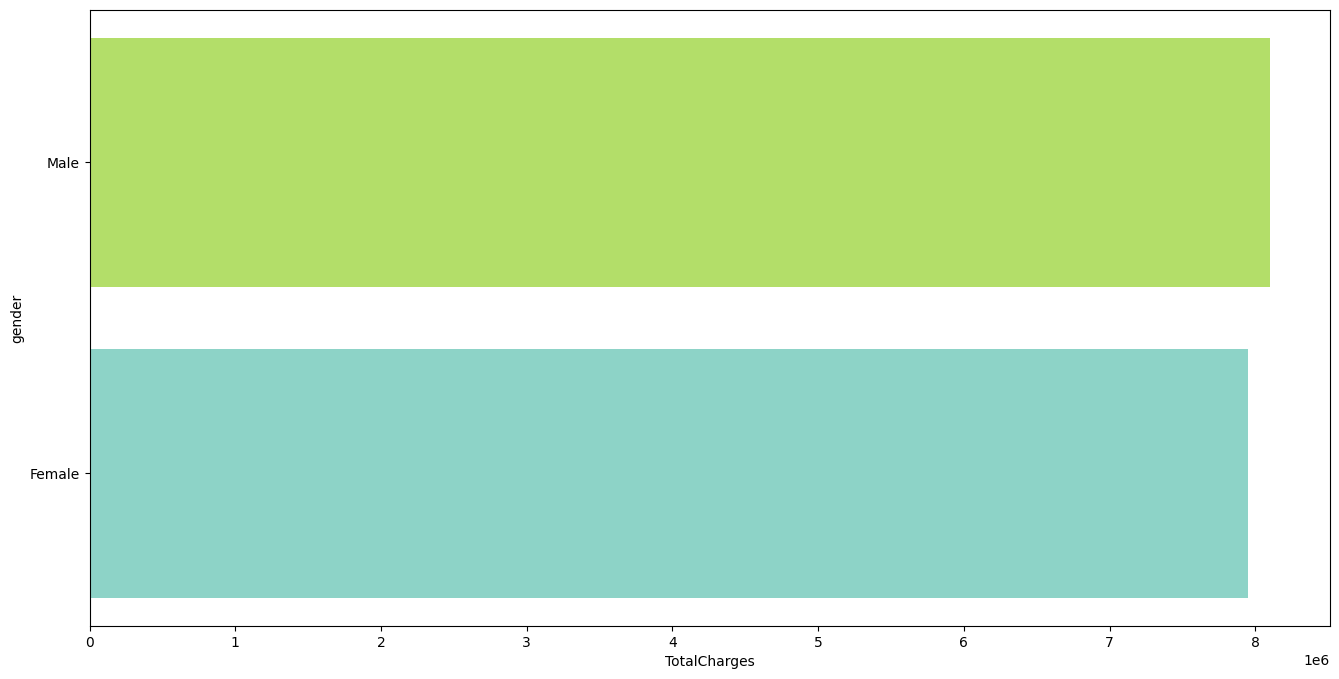

In [63]:
plt.figure(figsize = (16,8))
plt.barh(width = 'TotalCharges', y = 'gender', data = df, color = colors)
plt.xlabel('TotalCharges', fontsize = 10)
plt.ylabel('gender', fontsize = 10)
plt.show()